### ep2-julia: linear regression

In [1]:
# libraries
using Metrics          # r2-score
using Random
using Distributions
using Plots; gr()
using Printf

using CSV
using DataFrames

### code d = 1

In [2]:
# generates artificial linear data
function artificial_linear_data(N)
    X = [range(90, 1200; length=N);]
    gamma = rand(Normal(30, 10), N)
    y = 50 * X + gamma * 400
    (X, y)
end

X, y = artificial_linear_data(100)
size(X), mean(X), std(X), size(y), mean(y), std(y)

((100,), 645.0000000000001, 325.2803645780711, (100,), 44284.27880255166, 17273.422208461063)

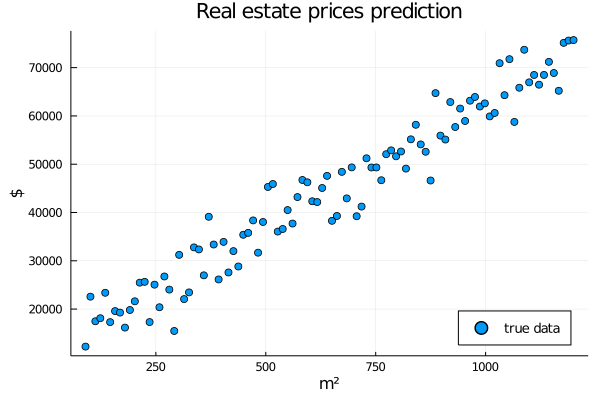

In [3]:
function plot_points_regression(X, y)
    scatter(X, y, 
        title = "Real estate prices prediction",
        xlabel = "m\u00b2",
        ylabel = "\$",
        yformatter = :plain,
        legend = :bottomright,
        legendfontsize = 9,
        label = "true data")
end

plot_points_regression(X, y)

Cap 3 lecture Prof Mostafa

Colocar aqui a demonstração de minimizar Ein matricialmente (igualar o gradiente a zero), matriz pseudo-inversa de X, etc.

In [4]:
# function that implements inear regression calculation (weights calculation) from (X, y) data available.

function linear_regression_weights(X, y)   # normal_equation_weights
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    w = inv(X_til' * X_til) * X_til' * y
end

w = linear_regression_weights(X, y)

2-element Array{Float64,1}:
 10963.068962050693
    51.660790450389

In [5]:
# function that predicts ŷ values from w and unkwown values of X.

function linear_regression_prediction(X, w)
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    ŷ = X_til * w
end

ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)

0.9464136883740142

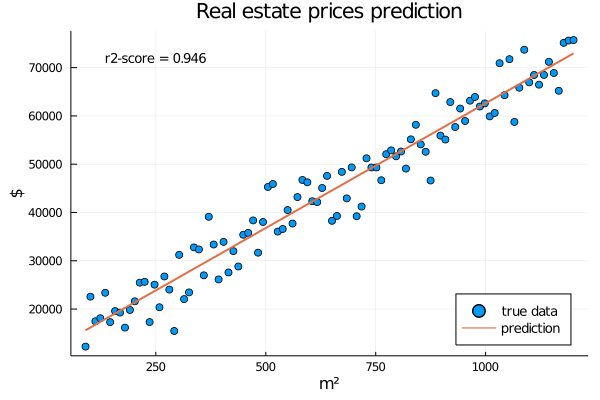

In [6]:
plot_points_regression(X, y)
plot!(X, ŷ, label = "prediction", linewidth = 2)
annotate!(250, 72000, text(@sprintf("r2-score = %.3f", r2), 9))

In [7]:
# Let us use the prediction function
x = [650]
prediction = linear_regression_prediction(x, w)
@printf("size = %s m2; predicted value = \$ %0.2f", x[1], prediction[1])


size = 650 m2; predicted value = $ 44542.58

### dataframe example, d = 1

In [8]:
# read dataframe
df = CSV.File("QT1data.csv") |> DataFrame
println(first(df, 10))

# get y = weight
y = df.Weight * 1.0  # conversão de Int para Float
display(typeof(y))

# get X
X = df.Height
display(size(X))


Array{Float64,1}

(130,)

10×6 DataFrame
 Row │ Sex      Age    Height  Weight  Shoe number  Trouser number 
     │ String7  Int64  Int64   Int64   Int64        String3        
─────┼─────────────────────────────────────────────────────────────
   1 │ Female      53     154      59           36  40
   2 │ Male        23     170      56           40  38
   3 │ Female      23     167      63           37  40
   4 │ Male        21     178      78           40  40
   5 │ Female      25     153      58           36  38
   6 │ Male        28     180      89           43  46
   7 │ Male        23     183      68           42  38
   8 │ Male        32     174      83           40  44
   9 │ Female      24     160      70           37  42
  10 │ Female      22     156      56           36  40


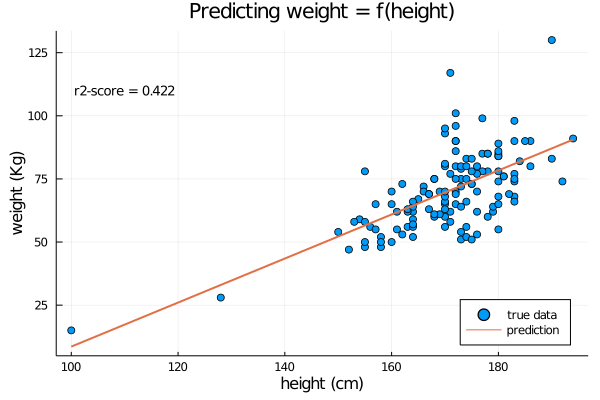

In [9]:
w = linear_regression_weights(X, y)
ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)

scatter(X, y, 
    title = "Predicting weight = f(height)",
    label = "true data", 
    legend = :bottomright,
    xlabel="height (cm)",
    ylabel="weight (Kg)")
plot!(X, ŷ, 
    label = "prediction", 
    linewidth = 2)
annotate!(110, 110, text(@sprintf("r2-score = %.3f", r2), 9))

### d = 2

In [10]:
# get X
feature_cols = ["Height", "Shoe number"]
X = df[:, feature_cols] |> Array
display(size(X))

w = linear_regression_weights(X, y)
ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)


(130, 2)

0.45381183096658584

### d = 3

In [11]:
# get X
feature_cols = ["Shoe number", "Age", "Height"]
X = df[:, feature_cols] |> Array
display(size(X))

w = linear_regression_weights(X, y)
ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)

(130, 3)

0.47764994986696174